SVM

Precision: 0.9431
Recall: 0.9274
Accuracy: 0.9533
Confusion Matrix:
[[59171  1950]
 [ 2531 32348]]


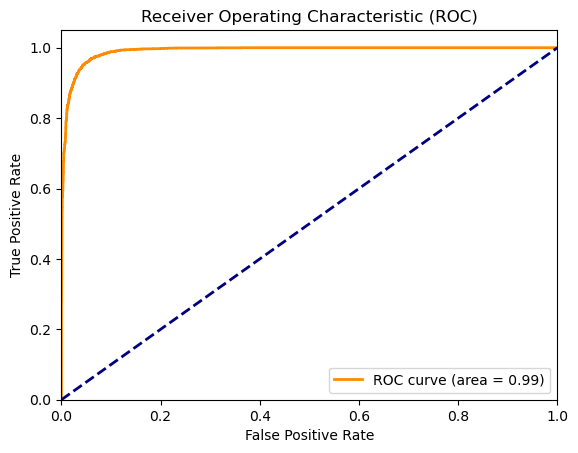

In [28]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_curve, auc
from sklearn import svm
import matplotlib.pyplot as plt

df = pd.read_csv('augmented_dataset.csv')
X = df.iloc[:, :12]
y = df.iloc[:, 13]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

# Create an SVM classifier
clf = svm.SVC()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

#  print the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

#  ROC curve 
y_score = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#Random Forest 

Precision: 0.9893
Recall: 0.9892
Accuracy: 0.9892
Confusion Matrix:
[[61029    92]
 [  943 33936]]


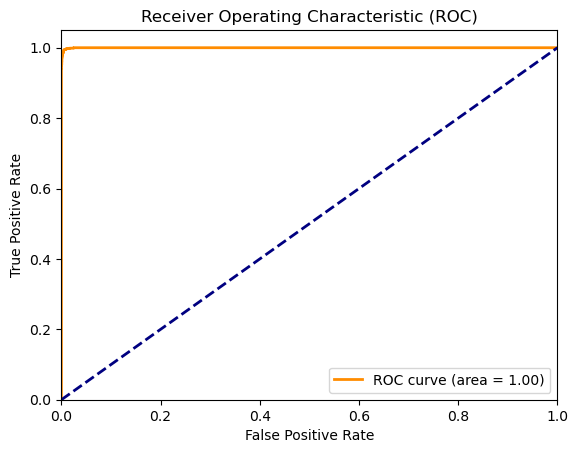

In [29]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest
import matplotlib.pyplot as plt


df = pd.read_csv('augmented_dataset.csv')

# Split the data into features (X) and target (y)
X = df.iloc[:, :12]
y = df.iloc[:, 13]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

# Create a Random Forest classifier with the specified hyperparameters
clf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=10)

# Train the classifier on the training data
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

#  confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# ROC curve
y_score = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


ANNN

Epoch 1/30
4500/4500 [==============================] - 3s 533us/step - loss: 0.4654 - accuracy: 0.7758
Epoch 2/30
4500/4500 [==============================] - 2s 523us/step - loss: 0.3224 - accuracy: 0.8606
Epoch 3/30
4500/4500 [==============================] - 2s 523us/step - loss: 0.2626 - accuracy: 0.8905
Epoch 4/30
4500/4500 [==============================] - 2s 511us/step - loss: 0.2304 - accuracy: 0.9039
Epoch 5/30
4500/4500 [==============================] - 2s 505us/step - loss: 0.2185 - accuracy: 0.9101
Epoch 6/30
4500/4500 [==============================] - 2s 503us/step - loss: 0.2088 - accuracy: 0.9138
Epoch 7/30
4500/4500 [==============================] - 2s 511us/step - loss: 0.2023 - accuracy: 0.9183
Epoch 8/30
4500/4500 [==============================] - 2s 507us/step - loss: 0.1980 - accuracy: 0.9198
Epoch 9/30
4500/4500 [==============================] - 2s 522us/step - loss: 0.1938 - accuracy: 0.9212
Epoch 10/30
4500/4500 [==============================] - 2s 535u

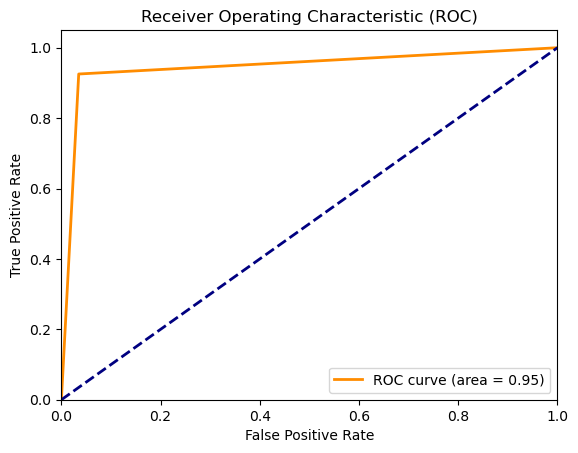

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
import matplotlib.pyplot as plt


df = pd.read_csv('augmented_dataset.csv')


X = df.iloc[:, :12]
y = df.iloc[:, 13]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)


classifier = Sequential()
classifier.add(Dense(units=64, kernel_initializer='he_normal', activation='relu', input_dim=12))  # Increased units and used he_normal initializer
classifier.add(Dropout(0.5))  # Adding dropout for regularization
classifier.add(Dense(units=64, kernel_initializer='he_normal', activation='relu'))  # Increased units and used he_normal initializer
classifier.add(Dropout(0.5))  # Adding dropout for regularization
classifier.add(Dense(units=32, kernel_initializer='he_normal', activation='relu'))  # Increased units and used he_normal initializer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Train model 
epochs_per_training = 30  
X_train = X_train.values
y_train = y_train.values
classifier.fit(X_train, y_train, epochs=epochs_per_training, verbose=1)
t
X_test = X_test.values
y_test = y_test.values
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

#  confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

#  ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


LSTM

2023-11-09 19:32:02.226835: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-09 19:32:02.227776: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-09 19:32:02.228411: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/30


2023-11-09 19:32:02.563973: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-09 19:32:02.565012: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-09 19:32:02.565700: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2025/2025 - 31s - loss: 0.3811 - accuracy: 0.8239 - val_loss: 0.3207 - val_accuracy: 0.8558 - 31s/epoch - 15ms/step
Epoch 2/30
2025/2025 - 27s - loss: 0.2485 - accuracy: 0.8918 - val_loss: 0.2268 - val_accuracy: 0.9062 - 27s/epoch - 13ms/step
Epoch 3/30
2025/2025 - 27s - loss: 0.1956 - accuracy: 0.9163 - val_loss: 0.1292 - val_accuracy: 0.9459 - 27s/epoch - 13ms/step
Epoch 4/30
2025/2025 - 27s - loss: 0.1339 - accuracy: 0.9446 - val_loss: 0.0833 - val_accuracy: 0.9663 - 27s/epoch - 13ms/step
Epoch 5/30
2025/2025 - 27s - loss: 0.1048 - accuracy: 0.9575 - val_loss: 0.0836 - val_accuracy: 0.9642 - 27s/epoch - 13ms/step
Epoch 6/30
2025/2025 - 27s - loss: 0.0859 - accuracy: 0.9649 - val_loss: 0.0632 - val_accuracy: 0.9742 - 27s/epoch - 13ms/step
Epoch 7/30
2025/2025 - 27s - loss: 0.0747 - accuracy: 0.9699 - val_loss: 0.0635 - val_accuracy: 0.9730 - 27s/epoch - 13ms/step
Epoch 8/30
2025/2025 - 27s - loss: 0.0666 - accuracy: 0.9739 - val_loss: 0.0504 - val_accuracy: 0.9781 - 27s/epoch - 13ms/

2023-11-09 19:45:27.729802: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-09 19:45:27.730894: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-09 19:45:27.731665: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3000/3000 [==============================] - 11s 4ms/step
Accuracy: 99.99%
Precision: 0.9997
Recall: 1.0000
Confusion Matrix:
[[61112     9]
 [    0 34879]]


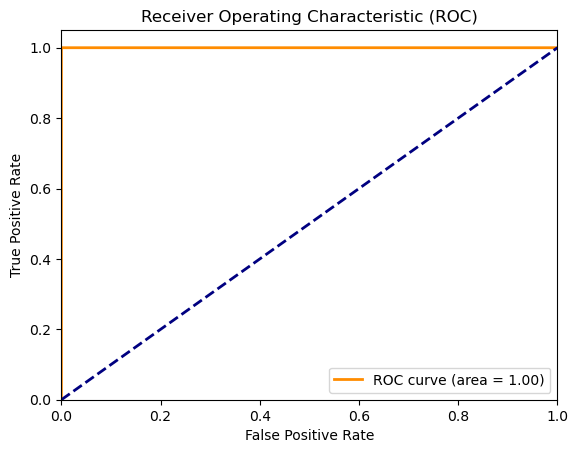

In [38]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


df = pd.read_csv('augmented_dataset.csv')

# Split the data into features (X) and target (y)
X = df.iloc[:, :12]
y = df.iloc[:, 13]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

#  LSTM model
model = Sequential()


model.add(LSTM(units=128, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(units=32))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))# activation function
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #optimizer

# Reshape the training and testing data to fit the LSTM input shape
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.1, verbose=2)

y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)
y_pred_binary = y_pred_binary.astype(int)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

#  confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:')
print(confusion)

#  ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
FNN

Epoch 1/50
1013/1013 - 3s - loss: 0.3719 - accuracy: 0.8307 - val_loss: 0.1833 - val_accuracy: 0.9237 - 3s/epoch - 3ms/step
Epoch 2/50
1013/1013 - 2s - loss: 0.2271 - accuracy: 0.9037 - val_loss: 0.1431 - val_accuracy: 0.9401 - 2s/epoch - 2ms/step
Epoch 3/50
1013/1013 - 2s - loss: 0.2043 - accuracy: 0.9144 - val_loss: 0.1407 - val_accuracy: 0.9410 - 2s/epoch - 2ms/step
Epoch 4/50
1013/1013 - 2s - loss: 0.1881 - accuracy: 0.9215 - val_loss: 0.1362 - val_accuracy: 0.9440 - 2s/epoch - 2ms/step
Epoch 5/50
1013/1013 - 2s - loss: 0.1795 - accuracy: 0.9254 - val_loss: 0.1011 - val_accuracy: 0.9663 - 2s/epoch - 2ms/step
Epoch 6/50
1013/1013 - 2s - loss: 0.1717 - accuracy: 0.9281 - val_loss: 0.1044 - val_accuracy: 0.9567 - 2s/epoch - 2ms/step
Epoch 7/50
1013/1013 - 2s - loss: 0.1687 - accuracy: 0.9299 - val_loss: 0.1001 - val_accuracy: 0.9623 - 2s/epoch - 2ms/step
Epoch 8/50
1013/1013 - 2s - loss: 0.1667 - accuracy: 0.9322 - val_loss: 0.1020 - val_accuracy: 0.9615 - 2s/epoch - 2ms/step
Epoch 9/

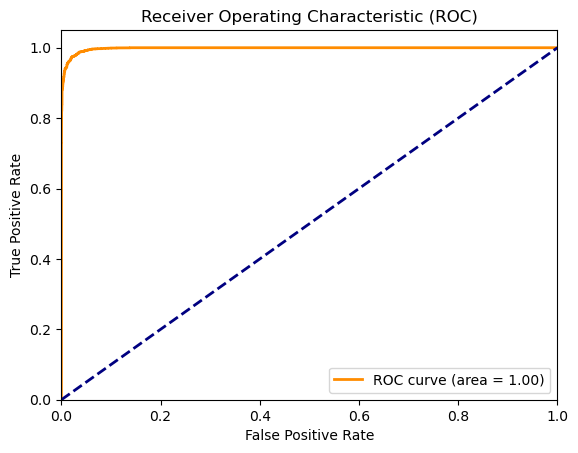

In [46]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

model = Sequential()

model.add(Dense(units=256, activation='relu', input_dim=X_train.shape[1]))
model.add(BatchNormalization())  #  normalization layer
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())  # Batch normalization layer
model.add(Dropout(0.5))  # Dropout layer

model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())  # Batch normalization layer
model.add(Dropout(0.5))  # Dropout layer

model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())  # Batch normalization layer
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(units=1, activation='sigmoid'))

# lossfunction and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.1, verbose=2)

y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)
y_pred_binary = y_pred_binary.astype(int)

#  precision, recall, and accuracy
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
loss = model.evaluate(X_test, y_test, verbose=0)[0]
accuracy = accuracy_score(y_test, y_pred_binary)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Loss: {loss:.4f}")

# confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:')
print(confusion)

# Calculate and plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title ('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
